### Import Library

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import math
from datetime import date, timedelta, datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # Packages for measuring model performance / errors
from tensorflow.keras import Sequential # Deep learning library, used for neural networks
from tensorflow.keras.layers import LSTM, Dense, Dropout # Deep learning classes for recurrent and regular densely-connected layers
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training
from sklearn.preprocessing import RobustScaler, MinMaxScaler # This Scaler removes the median and scales the data according to the quantile range to normalize the price data 
import seaborn as sns # Visualization

c:\Users\iqmalhafiyy\Anaconda3\envs\forex\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\iqmalhafiyy\Anaconda3\envs\forex\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\iqmalhafiyy\Anaconda3\envs\forex\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\iqmalhafiyy\Anaconda3\envs\forex\lib\site-pack

### Load Data

In [2]:
#USDMYR
main_df = pd.read_csv('USDMYR.csv', parse_dates=True, dayfirst=True,  index_col=0,usecols=['Date','Open','High','Low','Close'])
main_df

,Open,High,Low,Close
Date,,,,
2003-12-01,3.7870,3.8031,3.7857,3.7968
2003-12-02,3.7964,3.8021,3.7890,3.7971
2003-12-03,3.7974,3.8037,3.7892,3.7902
2003-12-04,3.7908,3.8075,3.7830,3.7987
2003-12-05,3.7959,3.8029,3.7884,3.7896
...,...,...,...,...
2022-04-20,4.2530,4.2900,4.2520,4.2530
2022-04-21,4.2790,4.2930,4.2790,4.2790
2022-04-22,4.2885,4.3235,4.2885,4.2885


In [3]:
#check missing values
print(main_df.isnull().sum())

Open     9
High     9
Low      9
Close    9
dtype: int64


In [4]:
# Convert all object columns to numerical
main_df = main_df.astype(float)

#Replace missing values in gold data
main_df = main_df.interpolate(limit_direction="both")
print(main_df)

              Open    High     Low   Close
Date                                      
2003-12-01  3.7870  3.8031  3.7857  3.7968
2003-12-02  3.7964  3.8021  3.7890  3.7971
2003-12-03  3.7974  3.8037  3.7892  3.7902
2003-12-04  3.7908  3.8075  3.7830  3.7987
2003-12-05  3.7959  3.8029  3.7884  3.7896
...            ...     ...     ...     ...
2022-04-20  4.2530  4.2900  4.2520  4.2530
2022-04-21  4.2790  4.2930  4.2790  4.2790
2022-04-22  4.2885  4.3235  4.2885  4.2885
2022-04-25  4.3225  4.3540  4.3225  4.3225
2022-04-26  4.3550  4.3550  4.3430  4.3500

[4802 rows x 4 columns]


In [5]:
# Replace missing values
# Multiple Imputation by Chained Equations

# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# MiceImputed = main_df.copy(deep=True) 
# mice_imputer = IterativeImputer()
# MiceImputed.iloc[:, :] = mice_imputer.fit_transform(main_df)
# main_df = MiceImputed

In [6]:
# Crude Oil Data
oil_data = pd.read_csv('Crude Oil.csv', parse_dates=True, dayfirst=True,  index_col=0,usecols=['Date','Open_Oil','High_Oil','Low_Oil','Close_Oil'])
print(oil_data)
print(oil_data['Open_Oil'].str.contains('-').value_counts()[True])

           Open_Oil High_Oil Low_Oil Close_Oil
Date                                          
2022-04-27   102.11   102.13   100.8    101.03
2022-04-27   101.76   102.99    99.8    102.02
2022-04-26    98.64   102.78   97.06     101.7
2022-04-25   101.38   101.55   95.28     98.54
2022-04-22   104.07   104.22  101.06    102.07
...             ...      ...     ...       ...
2013-08-29   109.53   110.07  107.72     108.8
2013-08-28   109.22   112.24  109.11     110.1
2013-08-27   106.14   109.32  105.88    109.01
2013-08-26   106.91   107.37  105.56    105.92
2013-08-23   105.22   106.94   104.3    106.42

[2187 rows x 4 columns]
3


In [7]:
# Replace string with NaN
oil_data = oil_data.replace(r'-', np.NaN, regex=True)
print(oil_data.isnull().sum())

Open_Oil     3
High_Oil     2
Low_Oil      4
Close_Oil    3
dtype: int64


In [8]:
# Convert all object columns to numerical
oil_data = oil_data.astype(float)

#Replace missing values in gold data
oil_imputed = oil_data.interpolate(limit_direction="both")
print(oil_imputed)

            Open_Oil  High_Oil  Low_Oil  Close_Oil
Date                                              
2022-04-27    102.11    102.13   100.80     101.03
2022-04-27    101.76    102.99    99.80     102.02
2022-04-26     98.64    102.78    97.06     101.70
2022-04-25    101.38    101.55    95.28      98.54
2022-04-22    104.07    104.22   101.06     102.07
...              ...       ...      ...        ...
2013-08-29    109.53    110.07   107.72     108.80
2013-08-28    109.22    112.24   109.11     110.10
2013-08-27    106.14    109.32   105.88     109.01
2013-08-26    106.91    107.37   105.56     105.92
2013-08-23    105.22    106.94   104.30     106.42

[2187 rows x 4 columns]


In [9]:
#Gold Data
gold_data = pd.read_csv('Gold_Price.csv', parse_dates=True, dayfirst=True, index_col=0, usecols=['Date','Open_Gold','High_Gold','Low_Gold','Close_Gold'])
print(gold_data)
print(gold_data['Open_Gold'].str.contains('-').value_counts()[True])

           Open_Gold High_Gold Low_Gold Close_Gold
Date                                              
2022-04-27    1886.8    1887.3   1880.4     1883.4
2022-04-27    1897.8    1900.6   1882.2     1885.9
2022-04-26    1900.5    1909.1     1894     1901.4
2022-04-25      1925      1925   1889.3     1893.2
2022-04-22    1949.6    1950.4   1930.2       1931
...              ...       ...      ...        ...
2000-09-05     275.8     275.8    275.8      275.8
2000-09-04         -         -        -          -
2000-09-01       277       277      277        277
2000-08-31     274.8     278.3    274.8      278.3
2000-08-30     273.9     273.9    273.9      273.9

[5516 rows x 4 columns]
81


In [10]:
# Replace string with NaN
gold_data = gold_data.replace(r'-', np.NaN, regex=True)
print(gold_data.isnull().sum())

Open_Gold     81
High_Gold     81
Low_Gold      81
Close_Gold    81
dtype: int64


In [11]:
# Convert all object columns to numerical
gold_data = gold_data.astype(float)
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5516 entries, 2022-04-27 to 2000-08-30
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open_Gold   5435 non-null   float64
 1   High_Gold   5435 non-null   float64
 2   Low_Gold    5435 non-null   float64
 3   Close_Gold  5435 non-null   float64
dtypes: float64(4)
memory usage: 215.5 KB


In [12]:
#Replace missing values in gold data
gold_imputed = gold_data.interpolate(limit_direction="both")
print(gold_imputed)

            Open_Gold  High_Gold  Low_Gold  Close_Gold
Date                                                  
2022-04-27     1886.8     1887.3    1880.4      1883.4
2022-04-27     1897.8     1900.6    1882.2      1885.9
2022-04-26     1900.5     1909.1    1894.0      1901.4
2022-04-25     1925.0     1925.0    1889.3      1893.2
2022-04-22     1949.6     1950.4    1930.2      1931.0
...               ...        ...       ...         ...
2000-09-05      275.8      275.8     275.8       275.8
2000-09-04      276.4      276.4     276.4       276.4
2000-09-01      277.0      277.0     277.0       277.0
2000-08-31      274.8      278.3     274.8       278.3
2000-08-30      273.9      273.9     273.9       273.9

[5516 rows x 4 columns]


In [13]:
#FBM KLCI data
fbmklci = pd.read_csv('FBMKLCI.csv', parse_dates=True, dayfirst=True, index_col=0)

fbmklci

,Open_FBMKLCI,High_FBMKLCI,Low_FBMKLCI,Close_FBMKLCI
Date,,,,
2022-05-23,1542.53,1542.53,1542.53,1542.53
2022-05-20,1549.12,1549.12,1549.12,1549.12
2022-05-19,1549.41,1549.41,1549.41,1549.41
2022-05-18,1554.91,1554.91,1554.91,1554.91
2022-05-17,1548.60,1548.60,1548.60,1548.60
...,...,...,...,...
2013-08-01,1688.91,1688.91,1688.91,1688.91
2013-07-01,1694.16,1694.16,1694.16,1694.16
2013-04-01,1692.58,1692.58,1692.58,1692.58


In [14]:
USDMYR_Oil = pd.merge(main_df, oil_imputed, how='inner', on='Date')
USDMYR_Oil 

,Open,High,Low,Close,Open_Oil,High_Oil,Low_Oil,Close_Oil
Date,,,,,,,,
2013-08-23,3.3079,3.3116,3.1248,3.2984,105.22,106.94,104.30,106.42
2013-08-26,3.2966,3.3081,3.2859,3.3015,106.91,107.37,105.56,105.92
2013-08-27,3.3092,3.3362,3.2911,3.3277,106.14,109.32,105.88,109.01
2013-08-28,3.3278,3.3385,3.3150,3.3315,109.22,112.24,109.11,110.10
2013-08-29,3.3175,3.3249,3.2916,3.3078,109.53,110.07,107.72,108.80
...,...,...,...,...,...,...,...,...
2022-04-20,4.2530,4.2900,4.2520,4.2530,103.05,104.16,100.70,102.75
2022-04-21,4.2790,4.2930,4.2790,4.2790,102.50,105.42,102.01,103.79
2022-04-22,4.2885,4.3235,4.2885,4.2885,104.07,104.22,101.06,102.07


In [15]:
join_fbmklci = pd.merge(USDMYR_Oil, fbmklci, how='inner', on='Date')
join_fbmklci

,Open,High,Low,Close,Open_Oil,High_Oil,Low_Oil,Close_Oil,Open_FBMKLCI,High_FBMKLCI,Low_FBMKLCI,Close_FBMKLCI
Date,,,,,,,,,,,,
2013-08-23,3.3079,3.3116,3.1248,3.2984,105.22,106.94,104.30,106.42,1721.07,1721.07,1721.07,1721.07
2013-08-26,3.2966,3.3081,3.2859,3.3015,106.91,107.37,105.56,105.92,1722.49,1722.49,1722.49,1722.49
2013-08-27,3.3092,3.3362,3.2911,3.3277,106.14,109.32,105.88,109.01,1701.24,1701.24,1701.24,1701.24
2013-08-28,3.3278,3.3385,3.3150,3.3315,109.22,112.24,109.11,110.10,1686.17,1686.17,1686.17,1686.17
2013-08-29,3.3175,3.3249,3.2916,3.3078,109.53,110.07,107.72,108.80,1703.78,1703.78,1703.78,1703.78
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-20,4.2530,4.2900,4.2520,4.2530,103.05,104.16,100.70,102.75,1593.75,1593.75,1593.75,1593.75
2022-04-21,4.2790,4.2930,4.2790,4.2790,102.50,105.42,102.01,103.79,1598.32,1598.32,1598.32,1598.32
2022-04-22,4.2885,4.3235,4.2885,4.2885,104.07,104.22,101.06,102.07,1601.97,1601.97,1601.97,1601.97


In [16]:
data_join = pd.merge(join_fbmklci, gold_imputed, how='inner', on='Date')
data_join

,Open,High,Low,Close,Open_Oil,High_Oil,Low_Oil,Close_Oil,Open_FBMKLCI,High_FBMKLCI,Low_FBMKLCI,Close_FBMKLCI,Open_Gold,High_Gold,Low_Gold,Close_Gold
Date,,,,,,,,,,,,,,,,
2013-08-23,3.3079,3.3116,3.1248,3.2984,105.22,106.94,104.30,106.42,1721.07,1721.07,1721.07,1721.07,1376.8,1398.2,1373.9,1395.7
2013-08-26,3.2966,3.3081,3.2859,3.3015,106.91,107.37,105.56,105.92,1722.49,1722.49,1722.49,1722.49,1398.6,1402.8,1391.3,1393.0
2013-08-27,3.3092,3.3362,3.2911,3.3277,106.14,109.32,105.88,109.01,1701.24,1701.24,1701.24,1701.24,1403.8,1421.1,1398.7,1420.6
2013-08-28,3.3278,3.3385,3.3150,3.3315,109.22,112.24,109.11,110.10,1686.17,1686.17,1686.17,1686.17,1417.3,1428.0,1417.3,1419.0
2013-08-29,3.3175,3.3249,3.2916,3.3078,109.53,110.07,107.72,108.80,1703.78,1703.78,1703.78,1703.78,1417.4,1417.4,1404.5,1412.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-20,4.2530,4.2900,4.2520,4.2530,103.05,104.16,100.70,102.75,1593.75,1593.75,1593.75,1593.75,1945.5,1953.6,1945.5,1952.3
2022-04-21,4.2790,4.2930,4.2790,4.2790,102.50,105.42,102.01,103.79,1598.32,1598.32,1598.32,1598.32,1942.5,1944.9,1942.5,1944.9
2022-04-22,4.2885,4.3235,4.2885,4.2885,104.07,104.22,101.06,102.07,1601.97,1601.97,1601.97,1601.97,1949.6,1950.4,1930.2,1931.0


Selected features :
Low
Close
 High_FBMKLCI
 Close_FBMKLCI
Open_Gold
High_Gold
Low_Gold


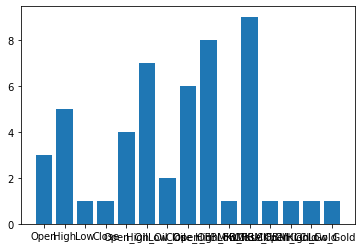

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

# features selection using Random Forest
array = data_join.values

x = array[:,[0,1,2,4,5,6,7,8,9,10,11,12,13,14,15]]
y = array[:,-1]

rfe = RFE(RandomForestRegressor(n_estimators=500, random_state=1))
fit = rfe.fit(x, y)

print('Selected features :')
names = data_join.columns.values[:]
for i in range(len(fit.support_)):
    if fit.support_[i]:
        print(names[i])

names = data_join.columns.values[0:-1]
ticks = [i for i in range(len(names))]
plt.bar(ticks, fit.ranking_)
plt.xticks(ticks, names)
plt.show()       

<AxesSubplot:xlabel='Date'>

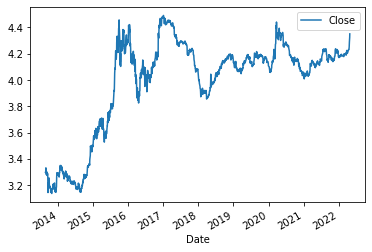

In [18]:
# Visualize USD-MYR close prices
data_join.plot.line(y="Close", use_index=True)

In [19]:
# Indexing batches 
train_df = data_join.sort_values(by=['Date']).copy()

# Input variables
features = ['Close','Open','High','Low','Open_Oil','Close_Oil','High_Oil',
            'Low_Oil','Open_Gold','Close_Gold','High_Gold','Low_Gold']

# Create the dataset with features and filter the data to the list of FEATURES
data = pd.DataFrame(train_df)
input_data = data[features]

# add actual close column
input_data_ext = data_join[["Close"]]
input_data_ext = input_data_ext.rename(columns = {'Close':'Actual_Close'})

In [20]:
# Ensure we know the actual closing price
#data = data_join[["Close"]]
#data = data.rename(columns = {'Close':'Actual_Close'})

# Setup our target.  This identifies if the price went up or down
#data["Target"] = data_join.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Close"]

In [21]:
data_prev = input_data.copy()
data_prev = data_prev.shift(1)

In [22]:
final_data = input_data_ext.join(data_prev).iloc[1:]
final_data

,Actual_Close,Close,Open,High,Low,Open_Oil,Close_Oil,High_Oil,Low_Oil,Open_Gold,Close_Gold,High_Gold,Low_Gold
Date,,,,,,,,,,,,,
2013-08-26,3.3015,3.2984,3.3079,3.3116,3.1248,105.22,106.42,106.94,104.30,1376.8,1395.7,1398.2,1373.9
2013-08-27,3.3277,3.3015,3.2966,3.3081,3.2859,106.91,105.92,107.37,105.56,1398.6,1393.0,1402.8,1391.3
2013-08-28,3.3315,3.3277,3.3092,3.3362,3.2911,106.14,109.01,109.32,105.88,1403.8,1420.6,1421.1,1398.7
2013-08-29,3.3078,3.3315,3.3278,3.3385,3.3150,109.22,110.10,112.24,109.11,1417.3,1419.0,1428.0,1417.3
2013-08-30,3.2839,3.3078,3.3175,3.3249,3.2916,109.53,108.80,110.07,107.72,1417.4,1412.9,1417.4,1404.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-20,4.2530,4.2330,4.2330,4.2545,4.2325,107.03,108.21,109.81,106.00,1973.4,1982.9,1997.1,1972.8
2022-04-21,4.2790,4.2530,4.2530,4.2900,4.2520,103.05,102.75,104.16,100.70,1945.5,1952.3,1953.6,1945.5
2022-04-22,4.2885,4.2790,4.2790,4.2930,4.2790,102.50,103.79,105.42,102.01,1942.5,1944.9,1944.9,1942.5


In [23]:
# Get the number of rows in the data
nrows = final_data.shape[0]

# Convert the data to numpy values
np_data_unscaled = np.array(final_data)
np_data = np.reshape(np_data_unscaled, (nrows, -1))
print(np_data.shape)

# Transform the data by scaling each feature to a range between 0 and 1
scaler = MinMaxScaler()
np_data_scaled = scaler.fit_transform(np_data_unscaled)

# Creating a separate scaler that works on a single column for scaling predictions
scaler_pred = MinMaxScaler()
df_Close = pd.DataFrame(final_data['Actual_Close'])
np_Close_scaled = scaler_pred.fit_transform(df_Close)

(1896, 13)


In [24]:
# Set the sequence length - this is the timeframe used to make a single prediction
sequence_length = 50

# Prediction Index
index_Close = final_data.columns.get_loc("Actual_Close")

# Split the training data into train and test data sets
# As a first step, we get the number of rows to train the model on 80% of the data 
train_data_len = math.ceil(np_data_scaled.shape[0] * 0.8)

# Create the training and test data
train_data = np_data_scaled[0:train_data_len, :]
test_data = np_data_scaled[train_data_len - sequence_length:, :]

# The NN needs data with the format of [samples, time steps, features]
# Here, we create N samples, sequence_length time steps per sample, and 6 features
def partition_dataset(sequence_length, data):
    x, y = [], []
    data_len = data.shape[0]
    for i in range(sequence_length, data_len):
        x.append(data[i-sequence_length:i, 1:]) #contains sequence_length values 0-sequence_length * columsn
        y.append(data[i, index_Close]) #contains the prediction values for validation,  for single-step prediction
    
    # Convert the x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
    return x, y

# Generate training data and test data
x_train, y_train = partition_dataset(sequence_length, train_data)
x_test, y_test = partition_dataset(sequence_length, test_data)

# Print the shapes: the result is: (rows, training_sequence, features) (prediction value, )
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# Validate that the prediction value and the input match up
# The last close price of the second input sample should equal the first prediction value
print(x_train[1][sequence_length-1][index_Close])
print(y_train[0])

(1467, 50, 12) (1467,)
(379, 50, 12) (379,)
0.04847410034729949
0.0337693046626768


In [25]:
# Configure the neural network model
model = Sequential()

# Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
n_neurons = x_train.shape[1] * x_train.shape[2]
print(n_neurons, x_train.shape[1], x_train.shape[2])
model.add(LSTM(n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2]))) 
model.add(LSTM(n_neurons, return_sequences=False))
model.add(Dense(5))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

600 50 12
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [31]:
# Training the model
epochs = 15
batch_size = 16
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history = model.fit(x_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs,
                    validation_data=(x_test, y_test)
                   )
                    
                    #callbacks=[early_stop])

Train on 1467 samples, validate on 379 samples
Epoch 1/15
1467/1467 [==============================] - 52s 35ms/sample - loss: 8.8679e-04 - val_loss: 2.3617e-04
Epoch 2/15
1467/1467 [==============================] - 53s 36ms/sample - loss: 7.2737e-04 - val_loss: 2.0066e-04
Epoch 3/15
1467/1467 [==============================] - 52s 36ms/sample - loss: 0.0010 - val_loss: 0.0030
Epoch 4/15
1467/1467 [==============================] - 52s 36ms/sample - loss: 8.6802e-04 - val_loss: 6.1119e-04
Epoch 5/15
1467/1467 [==============================] - 52s 36ms/sample - loss: 7.8980e-04 - val_loss: 2.3360e-04
Epoch 6/15
1467/1467 [==============================] - 56s 38ms/sample - loss: 7.6633e-04 - val_loss: 1.6625e-04
Epoch 7/15
1467/1467 [==============================] - 52s 36ms/sample - loss: 6.5587e-04 - val_loss: 1.2068e-04
Epoch 8/15
1467/1467 [==============================] - 52s 35ms/sample - loss: 7.8108e-04 - val_loss: 7.0318e-04
Epoch 9/15
1467/1467 [===========================

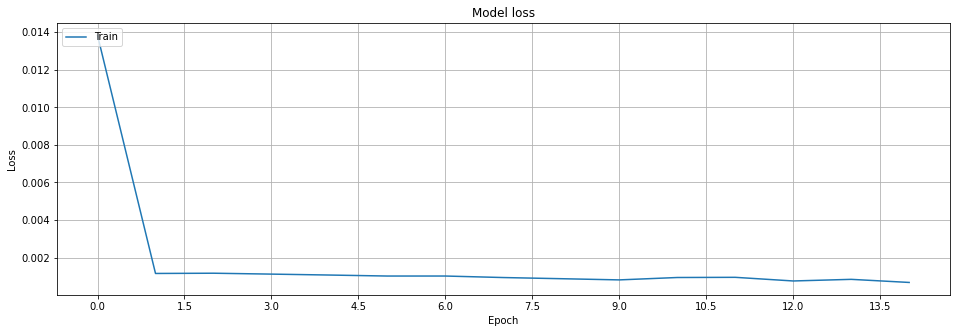

In [27]:
# Plot training & validation loss values
fig, ax = plt.subplots(figsize=(16, 5), sharex=True)
sns.lineplot(data=history.history["loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
ax.xaxis.set_major_locator(plt.MaxNLocator(epochs))
plt.legend(["Train", "Test"], loc="upper left")
plt.grid()
plt.show()

In [28]:
# Get the predicted values
y_pred_scaled = model.predict(x_test)

# Unscale the predicted values
y_pred = scaler_pred.inverse_transform(y_pred_scaled)
y_test_unscaled = scaler_pred.inverse_transform(y_test.reshape(-1, 1))

# Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test_unscaled, y_pred)
print(f'Mean Absolute Error (MAE): {np.round(MAE, 2)}')

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')

# R-Square (R2)
r = r2_score(y_test_unscaled, y_pred)
print(f'R-Squared Value (R2): {np.round(r, 2)}')

Mean Absolute Error (MAE): 0.04
Mean Absolute Percentage Error (MAPE): 0.88 %
Median Absolute Percentage Error (MDAPE): 0.8 %
R-Squared Value (R2): 0.6


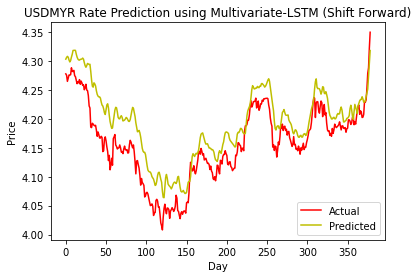

<Figure size 864x576 with 0 Axes>

In [29]:
# Plotting the predictions
def plot_data(y_test_unscaled, y_pred):
    plt.plot(y_test_unscaled,c = 'r')
    plt.plot(y_pred,c = 'y')
    plt.xlabel('Day')
    plt.ylabel('Price')
    plt.title("USDMYR Rate Prediction using Multivariate-LSTM (Shift Forward)")
    plt.legend(['Actual','Predicted'],loc = 'lower right')
    plt.figure(figsize=(12,8))
    plt.show()
    
plot_data(y_test_unscaled, y_pred)

In [30]:
new_df = data[-sequence_length:]

N = sequence_length

# Get the last N day closing price values and scale the data to be values between 0 and 1
last_N_days = new_df[-sequence_length:].values
last_N_days_scaled = scaler.transform(last_N_days)

# Create an empty list and Append past N days
X_test_new = []
X_test_new.append(last_N_days_scaled)

# Convert the X_test data set to a numpy array and reshape the data
pred_price_scaled = model.predict(np.array(X_test_new))
pred_price_unscaled = scaler_pred.inverse_transform(pred_price_scaled.reshape(-1, 1))

# Print last price and predicted price for the next day
price_today = np.round(new_df['Actual_Close'][-1], 2)
predicted_price = np.round(pred_price_unscaled.ravel()[0], 2)
change_percent = np.round(100 - (price_today * 100)/predicted_price, 2)

plus = '+'; minus = ''
print(f'The close price for {"USD-MYR"} at {"2022-04-26"} was {price_today}')
print(f'The predicted close price is {predicted_price} ({plus if change_percent > 0 else minus}{change_percent}%)')

ValueError: X has 16 features, but MinMaxScaler is expecting 13 features as input.